In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\skip\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Text

## Bag of words

A widely used technique in NLP (natural language processing). It's a great approach to start with for any text-based problem. It's also the basis of many other more advanced methods. 

### Tokenization and transformation

The splitting of text into pieces is known as tokenization. The most common way to split is on words, but in some cases (for example in character based langauges) you may want to split on character or split on pairs or groups of words or even something more advanced. 

Groups of words in a split are known as n-gram. Two or three word combinations are known as bigrams and trigrams. Bigram exmaple: 'the lazy', 'brown fox' and trigrams 'brown fox jumps', 'jumps over the'

#### transformation

such as reducing all letters to lower case to prevent fox and Fox counting as 2 seperate accounts. 

#### Stemming

which strips word suffices can also be a transformation technique for extracting more signals out of different words with simiilar meanings. i.e. jump, jumping, jumps, jumped to al be expressed as jump

### Vectorization

After defining the dictionary you can convert any text to a set of numbers corresponding to the occurences of each dictionary word in the text. 

##### Stop Words

words that are generally not that important or meaningless i.e. 'the', 'is', 'and'. Most ML engineers will remove the stop words and most libraries have a pre-stop word list.

### Bag of words

One problem with bag of words models is the nature of simple word counts. if a non-stop-word is common in the corups for example 'data'. It's not necessarily infomrative to konw that the word also appears in a new text. Instead, you'd do better by focusing on relatively rare words that are more highly predictive of the outcome of interest. 

To this end, it's common to scale the word counts by the inverse of the total count of that word in the corpus. Because we're describing a corpus in numbers. If there is an abundent count of a word in the training corpus but not in the new document then there is some meaning there. This means preferring rare words over common to find meaning in the differences in the rare ones. 

#### term frequency-inverse document frequency (tf-idf)

This algo is commonly used to handle this issue. It calculates a product of the term frequency and inverses the document frequency. 

#### Laten semantic analysis (lsa) or latent semantic indexing (lsi)

The ideas is to use the bag of word counts to build a term document matrix, with a row for each term and a column for each document. The elements of this matrix are then normalized similarly to the tf-idf process in order to avoid frequent terms dominating the power of the matrix. 

The value of this is there are themes or concepts that the LSA can pattern out. For example 'dog' may have related words such as 'barking', 'kennel' so on. 

##### singular value decomposition (SVD)

you split the term document into 3 matrices (T,S,D). T is the term-concept matrix that relates the term (barking or kennel) to concepts (dog) and D is the concept document matrix that relates individual documents to concepts that you'll later use to extract the features from the LSA model. 

The S matrix holds the singular values. These denote the relative importance that a term has to a document. 

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD


In [10]:
def latent_semantic_analysis(docs):
    tfidf = TfidfVectorizer() #this uses default params
    tfidf.fit(docs) #creates the dictionary
    vecs = tfidf.transform(docs) #uses dictionary to vectorize documents
    svd = TruncatedSVD(n_components=100)
    svd.fit(vecs) #creating SVD matrices
    return svd.transform(vecs)

In [11]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

In [12]:

latent_semantic_analysis(newsgroups_train.data)

array([[ 0.24972705, -0.069432  , -0.01310874, ...,  0.02625137,
         0.00880413,  0.02763548],
       [ 0.1399918 , -0.07671531, -0.03975901, ..., -0.00473094,
         0.01231183, -0.04347074],
       [ 0.37184255, -0.04142705, -0.06709294, ..., -0.01225991,
         0.0663855 , -0.0488487 ],
       ..., 
       [ 0.18476811, -0.00611423, -0.08039291, ...,  0.01771869,
        -0.01478765, -0.00509547],
       [ 0.18795807, -0.06606652,  0.04156833, ...,  0.00142851,
        -0.02195797, -0.03078088],
       [ 0.08231697, -0.09080577,  0.00372698, ..., -0.02245882,
         0.01190784, -0.01012381]])

#### probailistic method (pLSA) or latent Dirichlet Analysis (LDA)

LSA is based on linear algebra (math with vectors and matrices) but an equivalent analysis scan be done using probabilistic methods that model each document as a statistical mixture of topic distrubitions. 

The specific assumptions are made on the distribution of topics. You build an the assumption that a document can be described by a small set of topics and that ay term (word) can be attributed to a topic. In practice, LDA, can perform well on diverse datasets. 

In [13]:
from gensim.models.ldamodel import LdaModel

C:\Users\skip\Anaconda2\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [14]:
def lda_model(docs):
    #build lda model and set the number of topics to extract
    return LdaModel(docs, num_topics=20)

In [15]:
def lda_vector(lda_model, doc):
    #gen features for a new documents
    return lda_model[doc]

In [16]:
from gensim.utils import mock_data
gensim_corpus = mock_data()

In [17]:
lda = lda_model(gensim_corpus)

### Content Expansion

#### follow links

A good example of link following is establish twitter sentiment. A blob of short characters may not be enough to understand sentiment so you may follow any links that are posted with the tweet as well and expand the tweet with the text from thelink to get a better idea. 

#### knowledge-base expansion

You could identify named entitites in the text and extend the original text with information about each named entity in an online knowledge base, think wikipedia. As you hit named entitites you would go out and grab text from a wikipedia entry and perform any of the text extraction algos on said entry.

This is a non-trivial task and there are plenty of research articls out on it. 

#### Text meta-features

This is a problem-dependent method. A tweet contains all sorts of valuable data that's particular to tweets and can be extracted for example hashtags, mentions and meta-info from twitter such as counts of retweets and favorites. 

For web based text, you could extract basic info form the link text such as the top level domain. 

## Image Features

### Simple image features

You make a single row with all pixels, converting the two dimensional image into one. If a color you have 3 images in one (red, blue, green channels). Normal pixel values are 0 to 1 or 0 to 255. Because of the size of modern images it can be said this process could easilly lead to overfitting

### Color features

If you are trying to categorize landscape images (sky, mountain, grass) it may be useful to represent by constituted colors. 

simple color statistics of each color channel of the image such as mean, median, mode, std deviation, skewness, kurtosis. This makes 18 features assuming a colored picture in RGB scale. 6 x 3. 

### Image metadata features

Some meta data examples

* manufacturer orientation landscape, portrait
* date-time
* compression jpeg, raw
* resolution
* aspect ratio
* exposure time
* aperture
* flash 
* focal length

## Extracting objects and shapes

### edge detection

the simplest way to represent shapes in images is to find their edges and build features on those. 

A few common algos

* sobel
* canny


In [19]:
import skimage

image = skimage.data.camera()
edges = skimage.filter.sobel(image)

AttributeError: 'module' object has no attribute 'data'

### Advanced-shape features

#### Histogram of oriented Gradients (hog)

1. calc the gradient image (which direction the edges of the image are 'moving')
2. divide the image into small blocks called cells
3. calculate the orientation of the gradients inside those cells
4. calculate the histogram of those orientations in the individual cells



In [20]:
from skimage import data, color, feature

In [21]:
image = color.rgb2gray(skimage.data.astronaut())
feature.hog(image, orientations=9, pixels_per_cell=(8,8), cells_per_block=(3,3), visualise=True)

C:\Users\skip\Anaconda2\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


(array([ 0.01901523,  0.01426503,  0.        , ...,  0.01419268,
         0.01640198,  0.00489649]),
 array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.01025812, ...,  0.00111188,
          0.        ,  0.        ],
        [ 0.        ,  0.00508466,  0.        , ...,  0.        ,
          0.00064617,  0.        ],
        ..., 
        [ 0.        ,  0.00091809,  0.        , ...,  0.        ,
          0.01232994,  0.        ],
        [ 0.        ,  0.        ,  0.01886175, ...,  0.01850313,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]))

### Dimensionality Reduction

When performing feature extraction- dimensionality reduction should be top of mind. 

#### Principle Component Analysis (PCA)
Allows you to takea  set of images and find 'typical' images that can be used as building blocks to represent the original images. Combing the first couple of principle components enables you to rebuild a large portion of the training images, whereas subsequent components will cover less-frequent patterns. 

These are exclusively linear algorithms. As features are generated by finding the 'distance' from a principle image.

#### Automatic feature extraction

Think of deep neural nets as the best way to automatically extract features. 

#### Time-series features

##### Classical time series

Is the numerical measurements that are taken over time. These are evenly spaced over time (hourly, monthly) but can have irregular data. 

1. value of the stock market measured hourly
2. Day to day energy consumption of a commercial building or residential home
3. the value, in dollars, of a client's bank account over time
4. sets of diagnostics monitored in an industrial manufacturing plant

##### Point processes
Is a collection of events that occur over time. As opposed to measuring numerical quantities over time, these re timestamp for each discrete event that happens plus the potential of other metadata bout the event. They are commonly called event streams. 

1. activity of a web users, measuring the time and type of each click (clickstream data)
2. worldwide occurences of earthquakes, hurricanes, disease outbreak and so forth
3. individual purchases made by a customer through the history of their account
4. event logs in a manufacturing plant, recording every time an employee touches teh system and every time a step in the manufacturing process is completed. 

In [22]:
import pandas as pd
from datetime import datetime

In [23]:
df = pd.read_csv("data/sfpd_incident_all.csv")
df[:5]

,IncidntNum,Category,Date,Time,PdDistrict
0,30203898,FRAUD,02/18/2003,16:30,NORTHERN
1,38261,WARRANTS,04/17/2003,22:45,NORTHERN
2,30203901,LARCENY/THEFT,02/18/2003,16:05,NORTHERN
3,30203923,DRUG/NARCOTIC,02/18/2003,17:00,BAYVIEW
4,30203923,OTHER OFFENSES,02/18/2003,17:00,BAYVIEW


In [24]:
df['Month'] = map(lambda x: datetime.strptime("/".join(x.split("/")[0:2]), "%m/%y"), df['Date'])

In [25]:
df[:5]

,IncidntNum,Category,Date,Time,PdDistrict,Month
0,30203898,FRAUD,02/18/2003,16:30,NORTHERN,2018-02-01
1,38261,WARRANTS,04/17/2003,22:45,NORTHERN,2017-04-01
2,30203901,LARCENY/THEFT,02/18/2003,16:05,NORTHERN,2018-02-01
3,30203923,DRUG/NARCOTIC,02/18/2003,17:00,BAYVIEW,2018-02-01
4,30203923,OTHER OFFENSES,02/18/2003,17:00,BAYVIEW,2018-02-01


In [26]:
df_ts = df.groupby('Month').aggregate(len)['IncidntNum']


(8000, 14000)

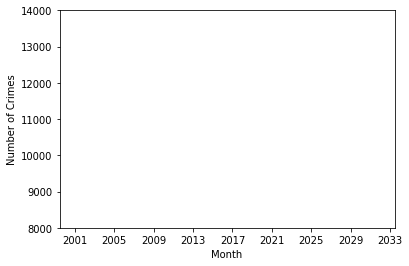

In [27]:
#plot time series
plot(df_ts.index, df_ts.values, '-k', lw=2)
xlabel('Month')
ylabel('Number of Crimes')
ylim((8000, 14000))